In [1]:
%matplotlib inline
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set_context('notebook')
import pystan 
import stan_utility
import arviz as az
import patsy
import os
import warnings 
warnings.simplefilter('ignore')#removes deprecation warnings
plt.style.use('seaborn-ticks')

order = ["Accuracy","Speed"]
df = pd.read_csv('trimmed_data.csv')
df = df[df.exp==1]

/home/gabriel/anaconda3/envs/pystan/lib/python3.7/site-packages/xarray/core/merge.py:18: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)
/home/gabriel/anaconda3/envs/pystan/lib/python3.7/site-packages/xarray/core/dataarray.py:1829: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  'DataArray', pd.Series, pd.DataFrame, pd.Panel]:


## Checking trimmed data

In [2]:
dfFull = pd.read_csv('../Raw_data/markers/MRK_SAT.csv')
dfFull = dfFull[dfFull.exp==1]

No response :

In [3]:
float(len(dfFull.rt) - len(dfFull[dfFull.trialType != "NR"].rt))/len(dfFull.rt) 

0.005

No available EMG :

In [4]:
float(len(dfFull[dfFull.trialType != "NR"].rt) - len(dfFull[(dfFull.trialType != "NR") & (dfFull.trialType != "UT")].rt))/len(dfFull[dfFull.trialType != "NR"].rt)

0.04082914572864322

Fast guesses exclusion by EWMA :

In [5]:
float(len(dfFull[(dfFull.trialType != "NR") & (dfFull.trialType != "UT")].rt) - len(df)) / len(dfFull[(dfFull.trialType != "NR") & (dfFull.trialType != "UT")].rt)

0.05797237034958057

# LME on RT PMT and MT

In [6]:
RT_fit = az.from_netcdf('/media/gabriel/DATA/BU_divers/DecomposingRT_V2_Bayes/Analysis/MixedModels/FittedModels/RT_Exp1_fit.nc')
PMT_fit =  az.from_netcdf('/media/gabriel/DATA/BU_divers/DecomposingRT_V2_Bayes/Analysis/MixedModels/FittedModels/PMT_Exp1_fit.nc')
MT_fit =  az.from_netcdf('/media/gabriel/DATA/BU_divers/DecomposingRT_V2_Bayes/Analysis/MixedModels/FittedModels/MT_Exp1_fit.nc')

In [7]:
az.summary(RT_fit, var_names=["raw_intercept","raw_beta"], round_to=2, credible_interval=.95)

,mean,sd,hpd_2.5%,hpd_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
raw_intercept,468.91,12.13,446.06,494.15,0.38,0.27,1038.55,1035.57,1045.37,1713.47,1.01
raw_beta[0],134.47,18.57,100.67,173.45,0.55,0.39,1126.82,1126.82,1123.96,1985.58,1.00
raw_beta[1],-93.98,9.99,-114.09,-74.22,0.25,0.17,1638.62,1635.79,1637.32,2413.34,1.00
raw_beta[2],10.76,5.51,-0.10,21.83,0.12,0.08,2142.84,2142.84,2197.25,3195.20,1.00
raw_beta[3],18.43,6.39,5.60,31.15,0.14,0.10,2237.41,2237.41,2208.01,3086.00,1.00
raw_beta[4],-65.41,8.61,-82.18,-47.26,0.16,0.12,2781.30,2781.30,2804.44,3642.61,1.00
raw_beta[5],70.88,12.10,47.72,95.86,0.23,0.16,2839.34,2819.75,2867.12,3935.55,1.00
raw_beta[6],25.50,14.49,-2.98,54.58,0.26,0.19,3042.05,3042.05,3050.01,3626.49,1.00
raw_beta[7],153.17,31.79,90.12,215.51,0.55,0.39,3368.93,3302.02,3415.43,3841.05,1.00


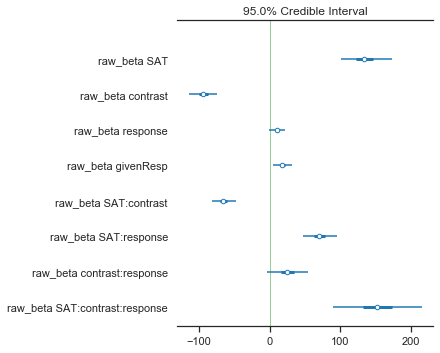

In [8]:
g = az.plot_forest(RT_fit, var_names="raw_beta", credible_interval=0.95, 
                   combined=True, rope=[0,0])
plt.show()


In [9]:
az.summary(PMT_fit, var_names=["raw_intercept","raw_beta"], round_to=2, credible_interval=.95)

,mean,sd,hpd_2.5%,hpd_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
raw_intercept,354.07,8.15,337.77,370.22,0.24,0.17,1147.57,1147.57,1145.95,1701.10,1.00
raw_beta[0],117.50,16.52,84.88,150.32,0.43,0.30,1485.54,1485.54,1476.51,2342.93,1.00
raw_beta[1],-80.73,9.24,-98.88,-61.93,0.23,0.16,1607.40,1607.40,1636.69,2392.26,1.01
raw_beta[2],-0.25,5.87,-11.28,11.85,0.12,0.08,2429.88,2429.88,2433.76,3378.12,1.00
raw_beta[3],0.46,8.33,-16.10,17.25,0.16,0.12,2617.92,2617.92,2607.33,3484.65,1.00
raw_beta[4],-61.51,8.36,-77.83,-44.39,0.15,0.10,3298.55,3288.19,3293.12,3955.89,1.00
raw_beta[5],75.14,14.16,49.39,104.88,0.27,0.19,2661.42,2661.42,2660.78,3894.83,1.00
raw_beta[6],2.96,16.12,-28.43,35.07,0.30,0.21,2873.41,2873.41,2879.71,3788.61,1.00
raw_beta[7],163.65,33.31,94.94,227.66,0.55,0.39,3674.53,3674.53,3663.95,4144.05,1.00


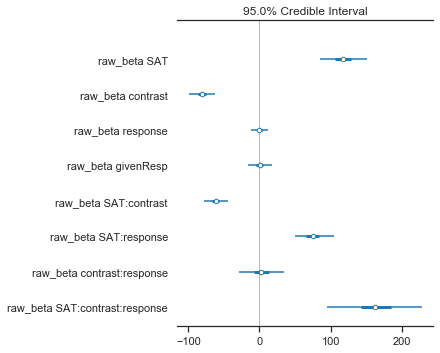

In [10]:
g = az.plot_forest(PMT_fit, var_names="raw_beta", credible_interval=0.95, 
                   combined=True, rope=[0,0])
plt.show()


In [11]:
az.summary(MT_fit, var_names=["raw_intercept","raw_beta"], round_to=2, credible_interval=.95)

,mean,sd,hpd_2.5%,hpd_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
raw_intercept,104.68,6.44,92.78,117.96,0.22,0.15,872.62,872.51,882.80,1448.55,1.0
raw_beta[0],15.35,3.39,8.87,22.13,0.10,0.07,1141.56,1141.56,1132.83,2051.46,1.0
raw_beta[1],-5.99,1.35,-8.65,-3.45,0.03,0.02,2056.35,2007.97,2100.54,2801.19,1.0
raw_beta[2],6.08,0.89,4.26,7.78,0.01,0.01,3726.01,3716.10,3751.25,3834.84,1.0
raw_beta[3],16.89,3.65,9.89,24.19,0.08,0.06,2146.07,2146.07,2138.68,3359.00,1.0
raw_beta[4],-1.07,1.21,-3.42,1.24,0.02,0.01,5927.00,4297.17,6084.20,4446.73,1.0
raw_beta[5],-1.28,1.44,-4.18,1.51,0.02,0.02,4647.68,3974.07,4727.71,4543.72,1.0
raw_beta[6],13.07,2.67,7.74,18.15,0.05,0.03,3350.24,3271.47,3383.22,3748.06,1.0
raw_beta[7],0.92,3.32,-5.34,7.41,0.04,0.04,6587.14,2883.86,6728.28,4359.44,1.0


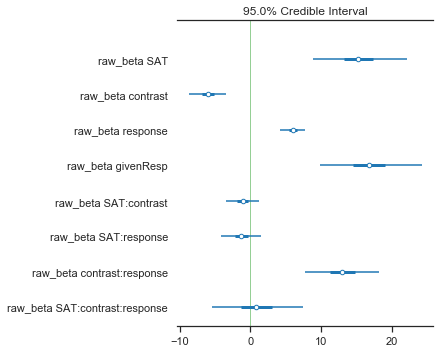

In [12]:
g = az.plot_forest(MT_fit, var_names="raw_beta", credible_interval=0.95, 
                   combined=True, rope=[0,0])
plt.show()


# GLME on precision

In [13]:
Precision_fit = az.from_netcdf('/media/gabriel/DATA/BU_divers/DecomposingRT_V2_Bayes/Analysis/MixedModels/FittedModels/Precision_Exp1_fit.nc')

In [14]:
az.summary(Precision_fit, var_names=["raw_intercept","raw_beta"], round_to=2, credible_interval=.95)

,mean,sd,hpd_2.5%,hpd_97.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
raw_intercept,0.84,0.02,0.80,0.87,0.0,0.0,599.63,599.63,716.49,872.74,1.00
raw_beta[0],0.06,0.01,0.03,0.08,0.0,0.0,1133.65,1067.13,1241.10,1555.86,1.00
raw_beta[1],0.15,0.02,0.11,0.19,0.0,0.0,635.26,635.26,751.87,337.16,1.01
raw_beta[2],0.03,0.01,0.01,0.06,0.0,0.0,2142.64,1840.18,2190.22,2016.20,1.00
raw_beta[3],0.08,0.02,0.04,0.12,0.0,0.0,1772.40,1626.16,1890.81,1956.39,1.00


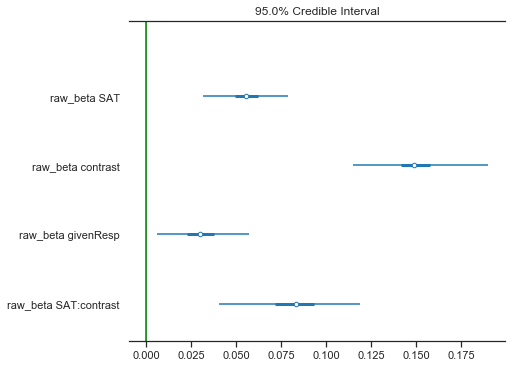

In [15]:
g = az.plot_forest(Precision_fit, var_names="raw_beta", credible_interval=0.95, 
                   combined=True, figsize=(7,5), rope=(0,0))
plt.vlines(0, -1, 10, 'g')
plt.show()


# Plotting raw effects on RT, PMT and MT

In [16]:
def std_within(df, dv, cond,unit):#Normalize according to cousineau's method, not really optimized...
    for i, con_dat in df.groupby(cond):
        grd_avrg = con_dat[dv].mean()
        for xx, sub_dat in con_dat.groupby(unit):
            sub_avrg = sub_dat[dv].mean()
            sub_dat['corrected'] = sub_dat.apply(lambda row: row[dv] - sub_avrg + grd_avrg, axis=1)
            df.loc[(df[cond[0]]==i[0])&(df[cond[1]]==i[1])&(df[unit]==xx), 'corrected%s' %dv]  = sub_dat['corrected']
std_within(df,'mt',['condition','contraste'],'participant')
std_within(df,'pmt',['condition','contraste'],'participant')
std_within(df,'rt',['condition','contraste'],'participant')

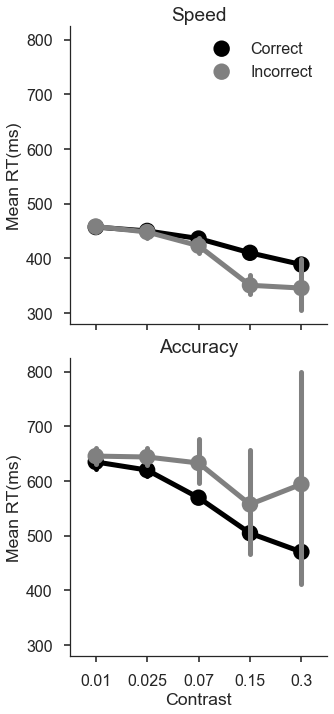

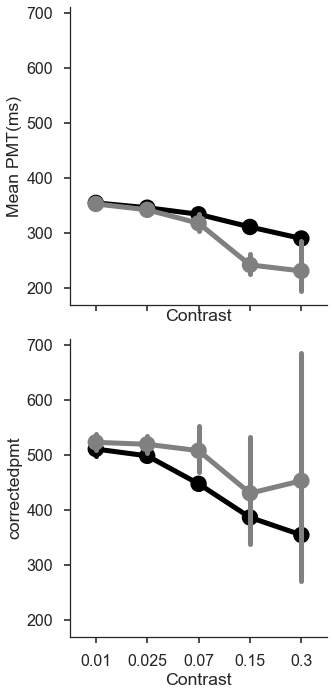

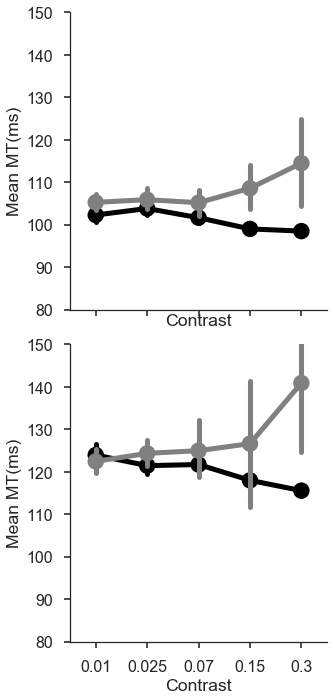

In [17]:
plt.style.use("seaborn-poster")
df['Response'] = df.apply(lambda row: 'Correct' if row['response']==1 else 'Incorrect', axis = 1)

g = sns.factorplot(x='contraste', y='correctedrt', units='participant', row='condition', hue='Response',data=df, palette=['k','gray'], dpi=300)
g.set(title="", xlabel="Contrast")
titles = ["Speed","Accuracy"]
i = 0
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)
    ax.set_ylabel('Mean RT(ms)')
    if i == 0:
        ax.set_xlabel("")
        ax.legend()
        i += 1
g._legend.remove()
plt.show()

g = sns.factorplot(x='contraste', y='correctedpmt', units='participant', row='condition', hue='Response',data=df, palette=['k','gray'])
g.set(title="", xlabel="Contrast")
i = 0
for ax, title in zip(g.axes.flat, titles):
    if i == 0:
        ax.set_ylabel('Mean PMT(ms)')
        i += 1
    else :
        ax.set_xlabel('Contrast')
g._legend.remove()
plt.show()

g = sns.factorplot(x='contraste', y='correctedmt', units='participant', row='condition', hue='Response',data=df, palette=['k','gray'])
g.set(title="", xlabel="Contrast")
i = 0
for ax, title in zip(g.axes.flat, titles):
    ax.set_ylabel('Mean MT(ms)')
    i += 1
    ax.set_ylim(80,150)
g._legend.remove()
plt.show()



# Frequentist Replication

In [13]:
%load_ext rpy2.ipython

/home/gabriel/anaconda3/envs/decomp/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Le chargement a nécessité le package : Matrix

  warnings.warn(x, RRuntimeWarning)
/home/gabriel/anaconda3/envs/decomp/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Le chargement a nécessité le package : carData

  warnings.warn(x, RRuntimeWarning)
/home/gabriel/anaconda3/envs/decomp/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: boundary (singular) fit: see ?isSingular

  warnings.warn(x, RRuntimeWarning)


Linear mixed model fit by REML ['lmerMod']
Formula: logrt ~ contraste.c * sResponse * SATcoded + GRcoded + (contraste.c *  
    sResponse * SATcoded + GRcoded | participant)
   Data: df1

REML criterion at convergence: 5422

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3822 -0.6782 -0.1273  0.5293  5.3057 

Random effects:
 Groups      Name                           Variance  Std.Dev. Corr       
 participant (Intercept)                    0.0077562 0.08807             
             contraste.c                    0.0005628 0.02372  -0.22      
             sResponse                      0.0012435 0.03526   0.47 -0.55
             SATcoded                       0.0110675 0.10520   0.63  0.13
             GRcoded                        0.0013896 0.03728  -0.31 -0.23
             contraste.c:sResponse          0.0028407 0.05330   0.57 -0.20
             contraste.c:SATcoded           0.0003435 0.01853  -0.58 -0.19
             sResponse:SATcoded             0.0033745 0.0

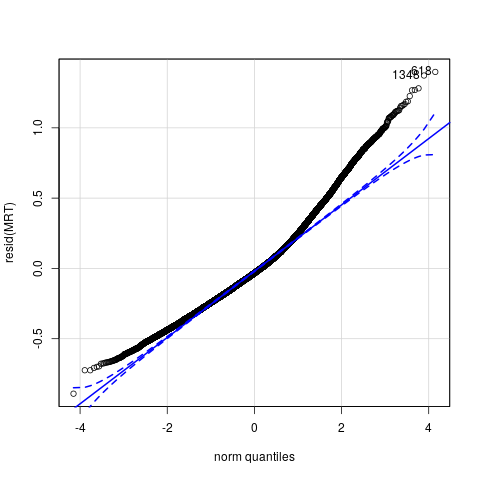

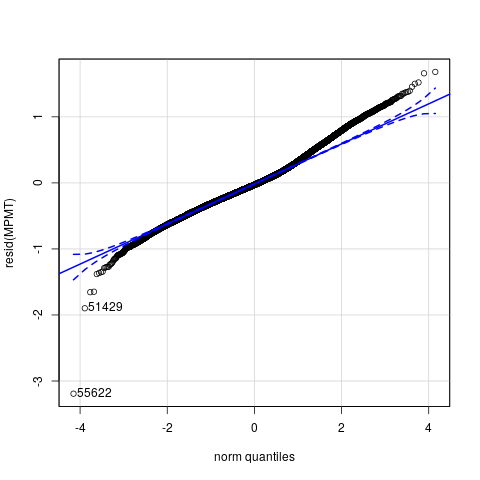

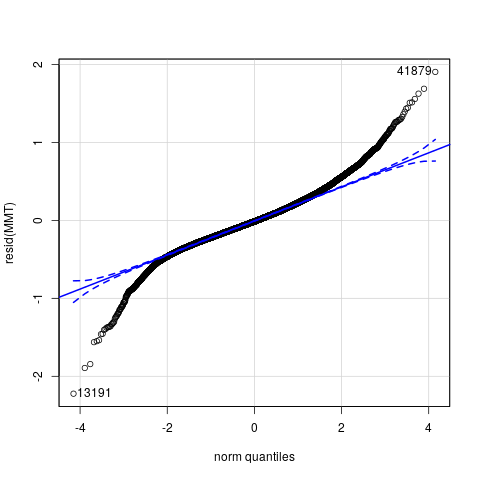

In [2]:
%%R 
library(lme4)
library(xtable)
library(car)
df = read.csv('trimmed_data.csv')

df1 = df[df$exp == 1,]
df1 = df1[complete.cases(df1$rt), ]

#Coding
df1$SATcoded <-ifelse(df1$condition=="Speed",-0.5,0.5) #Sum coding
df1$GRcoded<-ifelse(df1$givenResp=="Right",-0.5,0.5)#Sum coding
df1$contraste.c<- (df1$contraste - 0.07)*10 # Centering on mid contrast value and rescaling for ease of slope interpretation
df1$sResponse<-ifelse(df1$response==1,0,1)#Treatment coding

### Log transform
df1$logrt = log(df1$rtMNE)
df1$logpmt = log(df1$pmt)
df1$logmt = log(df1$mt)

### Models
MRT <- lmer(logrt ~ contraste.c * sResponse * SATcoded + GRcoded +
              (contraste.c * sResponse * SATcoded + GRcoded|participant), data=df1, REML=TRUE)
print(summary(MRT))


MPMT <- lmer(logpmt ~ contraste.c * sResponse * SATcoded+ GRcoded  +
               (contraste.c * sResponse * SATcoded + GRcoded|participant), data=df1, REML=TRUE)
print(summary(MPMT))

MMT <- lmer(logmt ~ SATcoded * contraste.c * sResponse+ GRcoded  +
              (contraste.c * sResponse * SATcoded + GRcoded|participant), data=df1, REML=TRUE)
print(summary(MMT))

In [3]:
%%R 
MPrec <- glmer(response ~ SATcoded * contraste.c + GRcoded +
                          (SATcoded + GRcoded|participant), family="binomial", data=df1)
print(summary(MPrec))
#print(confint(MPrec, method="Wald"))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: response ~ SATcoded * contraste.c + GRcoded + (SATcoded + GRcoded |  
    participant)
   Data: df1

     AIC      BIC   logLik deviance df.resid 
 25255.1  25346.6 -12616.6  25233.1    30197 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-36.203   0.029   0.199   0.620   1.152 

Random effects:
 Groups      Name        Variance Std.Dev. Corr       
 participant (Intercept) 0.03072  0.1753              
             SATcoded    0.01982  0.1408   -0.33      
             GRcoded     0.05100  0.2258   -0.05 -0.43
Number of obs: 30208, groups:  participant, 14

Fixed effects:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)           1.41290    0.05090   27.76  < 2e-16 ***
SATcoded              0.59341    0.05428   10.93  < 2e-16 ***
contraste.c           1.80175    0.03729   48.32  < 2e-16 ***
GRcoded               0.2

# Means


In [18]:
means = df[df.response==1].groupby(["contraste","condition"]).mean().reset_index()

In [19]:
wideRT = pd.pivot_table(means, values='rt', index=['contraste'],
                    columns=['condition'], aggfunc=np.mean).T.round(0)
print(wideRT)

contraste  0.010  0.025  0.070  0.150  0.300
condition                                   
Accuracy   636.0  621.0  571.0  505.0  470.0
Speed      457.0  451.0  437.0  410.0  388.0


In [20]:
widePMT = pd.pivot_table(means, values='pmt', index=['contraste'],
                    columns=['condition'], aggfunc=np.mean).T.round(0)
print(widePMT)

contraste  0.010  0.025  0.070  0.150  0.300
condition                                   
Accuracy   512.0  500.0  448.0  387.0  355.0
Speed      355.0  347.0  335.0  311.0  290.0


In [21]:
wideMT = pd.pivot_table(means, values='mt', index=['contraste'],
                    columns=['condition'], aggfunc=np.mean).T.round(0)
print(wideMT)

contraste  0.010  0.025  0.070  0.150  0.300
condition                                   
Accuracy   124.0  121.0  122.0  118.0  116.0
Speed      102.0  103.0  101.0   99.0   99.0
